This is how much space the figure will take up on letter paper


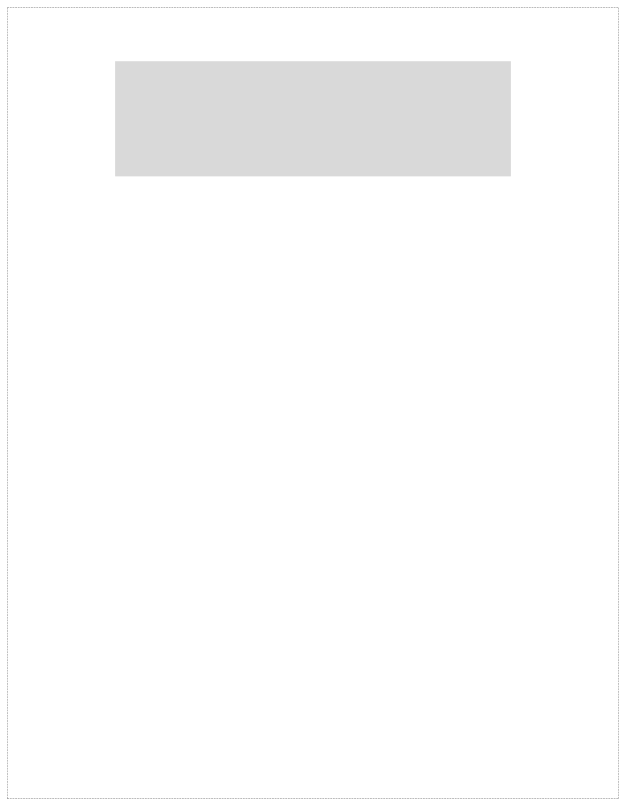

In [2]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [3]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim

from symfac.experimental import RBFExpansionV2

In [4]:
def funk(u, v):
    return np.exp(-np.subtract.outer(u, v)**2)

In [5]:
n = 57
np.random.seed(0)
u = 5*np.random.randn(n)
UU = gaussian_filter1d(u, 2.5, order=0)

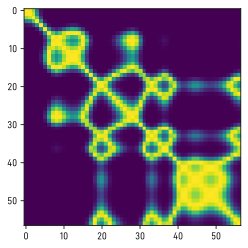

In [6]:
K = funk(np.array(UU), np.array(UU))
plt.imshow(K)

In [7]:
Kt = torch.tensor(K, device="cuda", dtype=torch.float32)


In [8]:
U, S, V = np.linalg.svd(K)
svd_K = []
for k in range(1,10):
    truncation = (U[:, :k] * S[None, :k]) @ V[:k, :]
    svd_K.append(round(float(F.mse_loss(torch.tensor(truncation), torch.tensor(K))), 5))

In [9]:
svd_K

[0.10433,
 0.0567,
 0.01857,
 0.00888,
 0.00518,
 0.00186,
 0.00091,
 0.00036,
 0.00014]

0.00518426


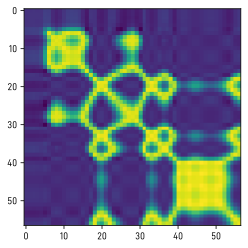

In [10]:
k=5
U, S, V = np.linalg.svd(K)
svd5 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd5)
print(round(float(F.mse_loss(svd5, Kt.cpu())), 8))

0.01857019


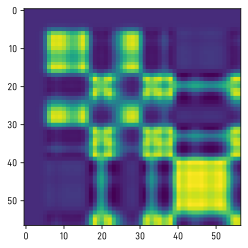

In [11]:
k=3
U, S, V = np.linalg.svd(K)
svd3 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd3)
print(round(float(F.mse_loss(svd3, Kt.cpu())), 8))

0.10433044


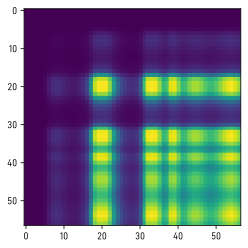

In [12]:
k=1
U, S, V = np.linalg.svd(K)
svd1 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd1)
print(round(float(F.mse_loss(svd1, Kt.cpu())), 8))

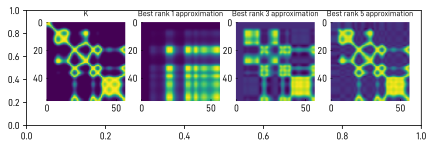

In [13]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]
axs[0].set_title(f'K', fontsize=8)
axs[0].imshow(K)
axs[1].set_title(f'Best rank 1 approximation', fontsize=8)
axs[1].imshow(svd1)
axs[2].set_title(f'Best rank 3 approximation', fontsize=8)
axs[2].imshow(svd3)
axs[3].set_title(f'Best rank 5 approximation', fontsize=8)
axs[3].imshow(svd5)



if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')